# Olympic Game Analytics 

- Team 
- topic 
- intro 


## Tasks : 


- provide some insight on your assigned sport event’s data 
- provide some insight on the athletes that competed in your assigned sport event.
    * performance of the most/least awarded athlete in several editions, 
	* how the average score/points evolved over several editions,
	* "here is the code that computes the rankings of the nationalities with more medals".
	* In detail, be creative
	* Our own ideas:
	* Nation 
		* ~~Which nation won the most (barchart / piechart)~~
		* Which nation took part the most (barchart / piechart)
		* Which nation is the fastest / slowest (barchart)
		* Which nation is the oldest / youngest (barchart)
		
	* Age 
		* Mean age for each nation 
        * age distribution (boxplot)
		* Age of winners / age of loosers 
		* Correlation age - time / age - speed / age - win 
	* Year of sport event 
		* number of Nations per year (barchart)
		* Mean time in each year / mean speed in each year
	* Round ? 
	* Time in seconds
        * highest / lowest 
        * distribution (boxplot)
        * mean times per nation 
	* Speed in kmh 
        * highest / lowest 
        * mean per year 
        * mean per country 
        * mean per round
	
- Augment the program developed in (1) to automatically generate two tables and three plots that can summarize your data, e.g., boxplots, barcharts, etc
- Write at least one test class and at least five test cases to verify the code developed in (1). Any test case must use developed with the unittest library.
- Write a report on your findings. The report must 
	* Describe the details of your assigned game, e.g., what is it, how is it organized, rules, etc.
	* Describe the analysis conducted in (1) and (2).
	* Describe the results and conclusions achieved in (1).
	* Include and describe the tables and plots generated in (2).
	* Be a .pdf file.
- Upload: zip 
	* groupXX_sportYY.zip, where XX is your group identifier (e.g., 01) and YY is the Olympic sport event identifier (e.g., 03).
	


In [1]:
import pandas as pd 
import numpy as np 

In [2]:
athlets = pd.read_csv('athlets.csv')   
sport_events = pd.read_csv('sport_events.csv')

athlets = athlets.rename(columns = {"id" : "athlete_id"})

display(athlets)
display(sport_events)

,athlete_id,name,nation,date_of_birth,sex
0,1,Jason Kenny,Great Britain,23/03/1988,male
1,2,Callum Skinner,Great Britain,20/08/1992,male
2,3,Matthew Glaetzer,Australia,24/08/1992,male
3,4,Denis Dmitriev,Russia,23/03/1986,male
4,5,Grégory Baugé,France,31/01/1985,male
...,...,...,...,...,...
77,78,Anthony Peden,New Zealand,15/09/1970,male
78,79,Nikolaos Angelidis,Greece,22/01/1977,male
79,80,Julio César Herrera,Cuba,11/03/1977,male
80,81,Christian Arrue,United States,08/01/1969,male


,year,athlete_id,round,rank,time_in_seconds,speedkmh
0,2000,66,heat 1,1,10.956,65.717
1,2000,81,heat 1,2,NaN,NaN
2,2000,67,heat 2,1,11.054,65.135
3,2000,80,heat 2,2,NaN,NaN
4,2000,68,heat 3,1,10.865,66.268
...,...,...,...,...,...,...
335,2016,17,finals,8,10.929,NaN
336,2016,4,finals,3,10.105,NaN
337,2016,3,finals,4,10.177,NaN
338,2016,1,finals,1,10.164,NaN


,year,athlete_id,round,rank,time_in_seconds,speedkmh
66,2000,66,finals,1,10.874,11.066
135,2004,45,finals,1,10.661,NaN
204,2008,38,finals,1,10.228,10.216
269,2012,1,finals,1,10.232,10.308
338,2016,1,finals,1,10.164,NaN


,year,athlete_id,round,rank,time_in_seconds,speedkmh,name,nation,date_of_birth,sex
0,2000,66,finals,1,10.874,11.066,Marty Nothstein,United States,10/02/1971,male
1,2004,45,finals,1,10.661,NaN,Ryan Bayley,Australia,09/03/1982,male
2,2008,38,finals,1,10.228,10.216,Chris Hoy,Great Britain,23/03/1976,male
3,2012,1,finals,1,10.232,10.308,Jason Kenny,Great Britain,23/03/1988,male
4,2016,1,finals,1,10.164,NaN,Jason Kenny,Great Britain,23/03/1988,male


<AxesSubplot:>

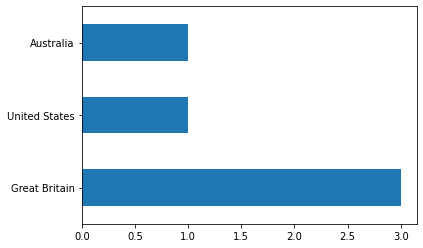

In [3]:
filtered = sport_events[(sport_events["round"] == "finals" ) & (sport_events["rank"] == 1 )]

display(filtered)

merged = pd.merge(filtered,athlets,on ='athlete_id', how ='inner') 

display(merged)

display(merged["nation"].value_counts().plot(kind='barh'))